In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
humans = pd.read_csv("data/humans.csv")
machines = pd.read_csv("data/machines.csv")
df = pd.concat([humans,machines])

In [158]:
len(humans)

61

In [3]:
df["type"]

0      False
1      False
2      False
3      False
4      False
       ...  
315    gpt-4
316    gpt-4
317    gpt-4
318    gpt-4
319    gpt-4
Name: type, Length: 381, dtype: object

In [4]:
df["type"].unique()

array([False, True, 'gpt-3.5-turbo', 'gpt-4'], dtype=object)

In [5]:
mapp = {x:x for x in df["type"].unique()}
mapp[False] = "not maximum grade"
mapp[True]  = "maximum grade"

In [6]:
df["type"] = df["type"].map(mapp)

In [7]:
df["type"].unique()

array(['not maximum grade', 'maximum grade', 'gpt-3.5-turbo', 'gpt-4'],
      dtype=object)

In [8]:
mapp = {s:"LLM" for s in  df["type"].unique()}
mapp["not maximum grade"] = "human"
mapp["maximum grade"] = "human"
df["model"] = df["type"].map(mapp)

In [9]:
df.sample(11).head()

MLC        MLS         MLT       DCC        DCT       CPC  \
259  22.458333  29.944444   89.833333  0.625000   2.500000  2.416667   
60   16.432432  40.533333   50.666667  0.675676   2.083333  0.405405   
11   18.241379  37.785714   75.571429  0.655172   2.714286  2.413793   
181  23.875000  34.727273  382.000000  0.625000  10.000000  3.625000   
149  16.551724  34.285714   43.636364  0.620690   1.636364  1.758621   

           CPT        TS  lexical_density  lexical_sophistication       ttr  \
259   9.666667  0.333333         0.393321                0.916667  0.441478   
60    1.250000  0.800000         0.356908                0.979167  0.481413   
11   10.000000  0.500000         0.387524                0.950000  0.454357   
181  58.000000  0.090909         0.424084                0.833333  0.502809   
149   4.636364  0.785714         0.385417                0.900000  0.532558   

      d-measure  profundidade_media  profundidade_max  token_quantity  \
259  102.253973            5.888889                10             539   
60   111.742068            6.000000                10             608   
11    97.574279            6.857143                11             529   
181  101.736991            6.818182                 9             382   
149  147.867477            5.357143                 9             480   

                                                  text           type  model  
259  Desafios para a Valorização de Comunidades Tra...          gpt-4    LLM  
60   Na música ''Imagine'', de John Lennon, é retra...  maximum grade  human  
11   A valorização de comunidades e povos tradicion...  gpt-3.5-turbo    LLM  
181  A valorização de comunidades e povos tradicion...  gpt-3.5-turbo    LLM  
149  A cultura de uma nação é um reflexo caleidoscó...          gpt-4    LLM

In [89]:
numeric_columns = df.select_dtypes(include='number').columns
df.groupby("type")[numeric_columns].agg(["mean", "std"]).round(1)

MLC        MLS          MLT        DCC       DCT       \
                   mean  std  mean   std   mean   std mean  std mean  std   
type                                                                        
gpt-3.5-turbo      21.5  4.4  35.9   4.5  100.1  45.8  0.7  0.1  3.2  1.7   
gpt-4              19.9  3.6  33.0   4.8   57.8  15.0  0.7  0.1  2.0  0.7   
maximum grade      19.7  3.9  43.4   7.2   59.5  13.9  0.7  0.1  2.2  0.8   
not maximum grade  16.7  4.8  37.4  10.4   58.9  23.5  0.6  0.1  2.4  1.5   

                   ...  ttr      d-measure       profundidade_media       \
                   ... mean  std      mean   std               mean  std   
type               ...                                                     
gpt-3.5-turbo      ...  0.5  0.0     106.9  10.8                6.6  0.6   
gpt-4              ...  0.5  0.0     129.3  17.6                6.0  0.6   
maximum grade      ...  0.5  0.0     113.5  11.5                6.6  0.9   
not maximum grade  ...  0.5  0.1     136.2  26.7                6.2  1.0   

                  profundidade_max      token_quantity         
                              mean  std           mean    std  
type                                                           
gpt-3.5-turbo                  9.6  1.5          489.6   59.4  
gpt-4                          9.7  1.4          548.7   60.1  
maximum grade                 10.9  1.8          650.0   80.5  
not maximum grade             10.1  2.2          412.8  120.7  

[4 rows x 30 columns]

In [10]:
# sns.pairplot(df,hue="model",diag_kind = "kde")

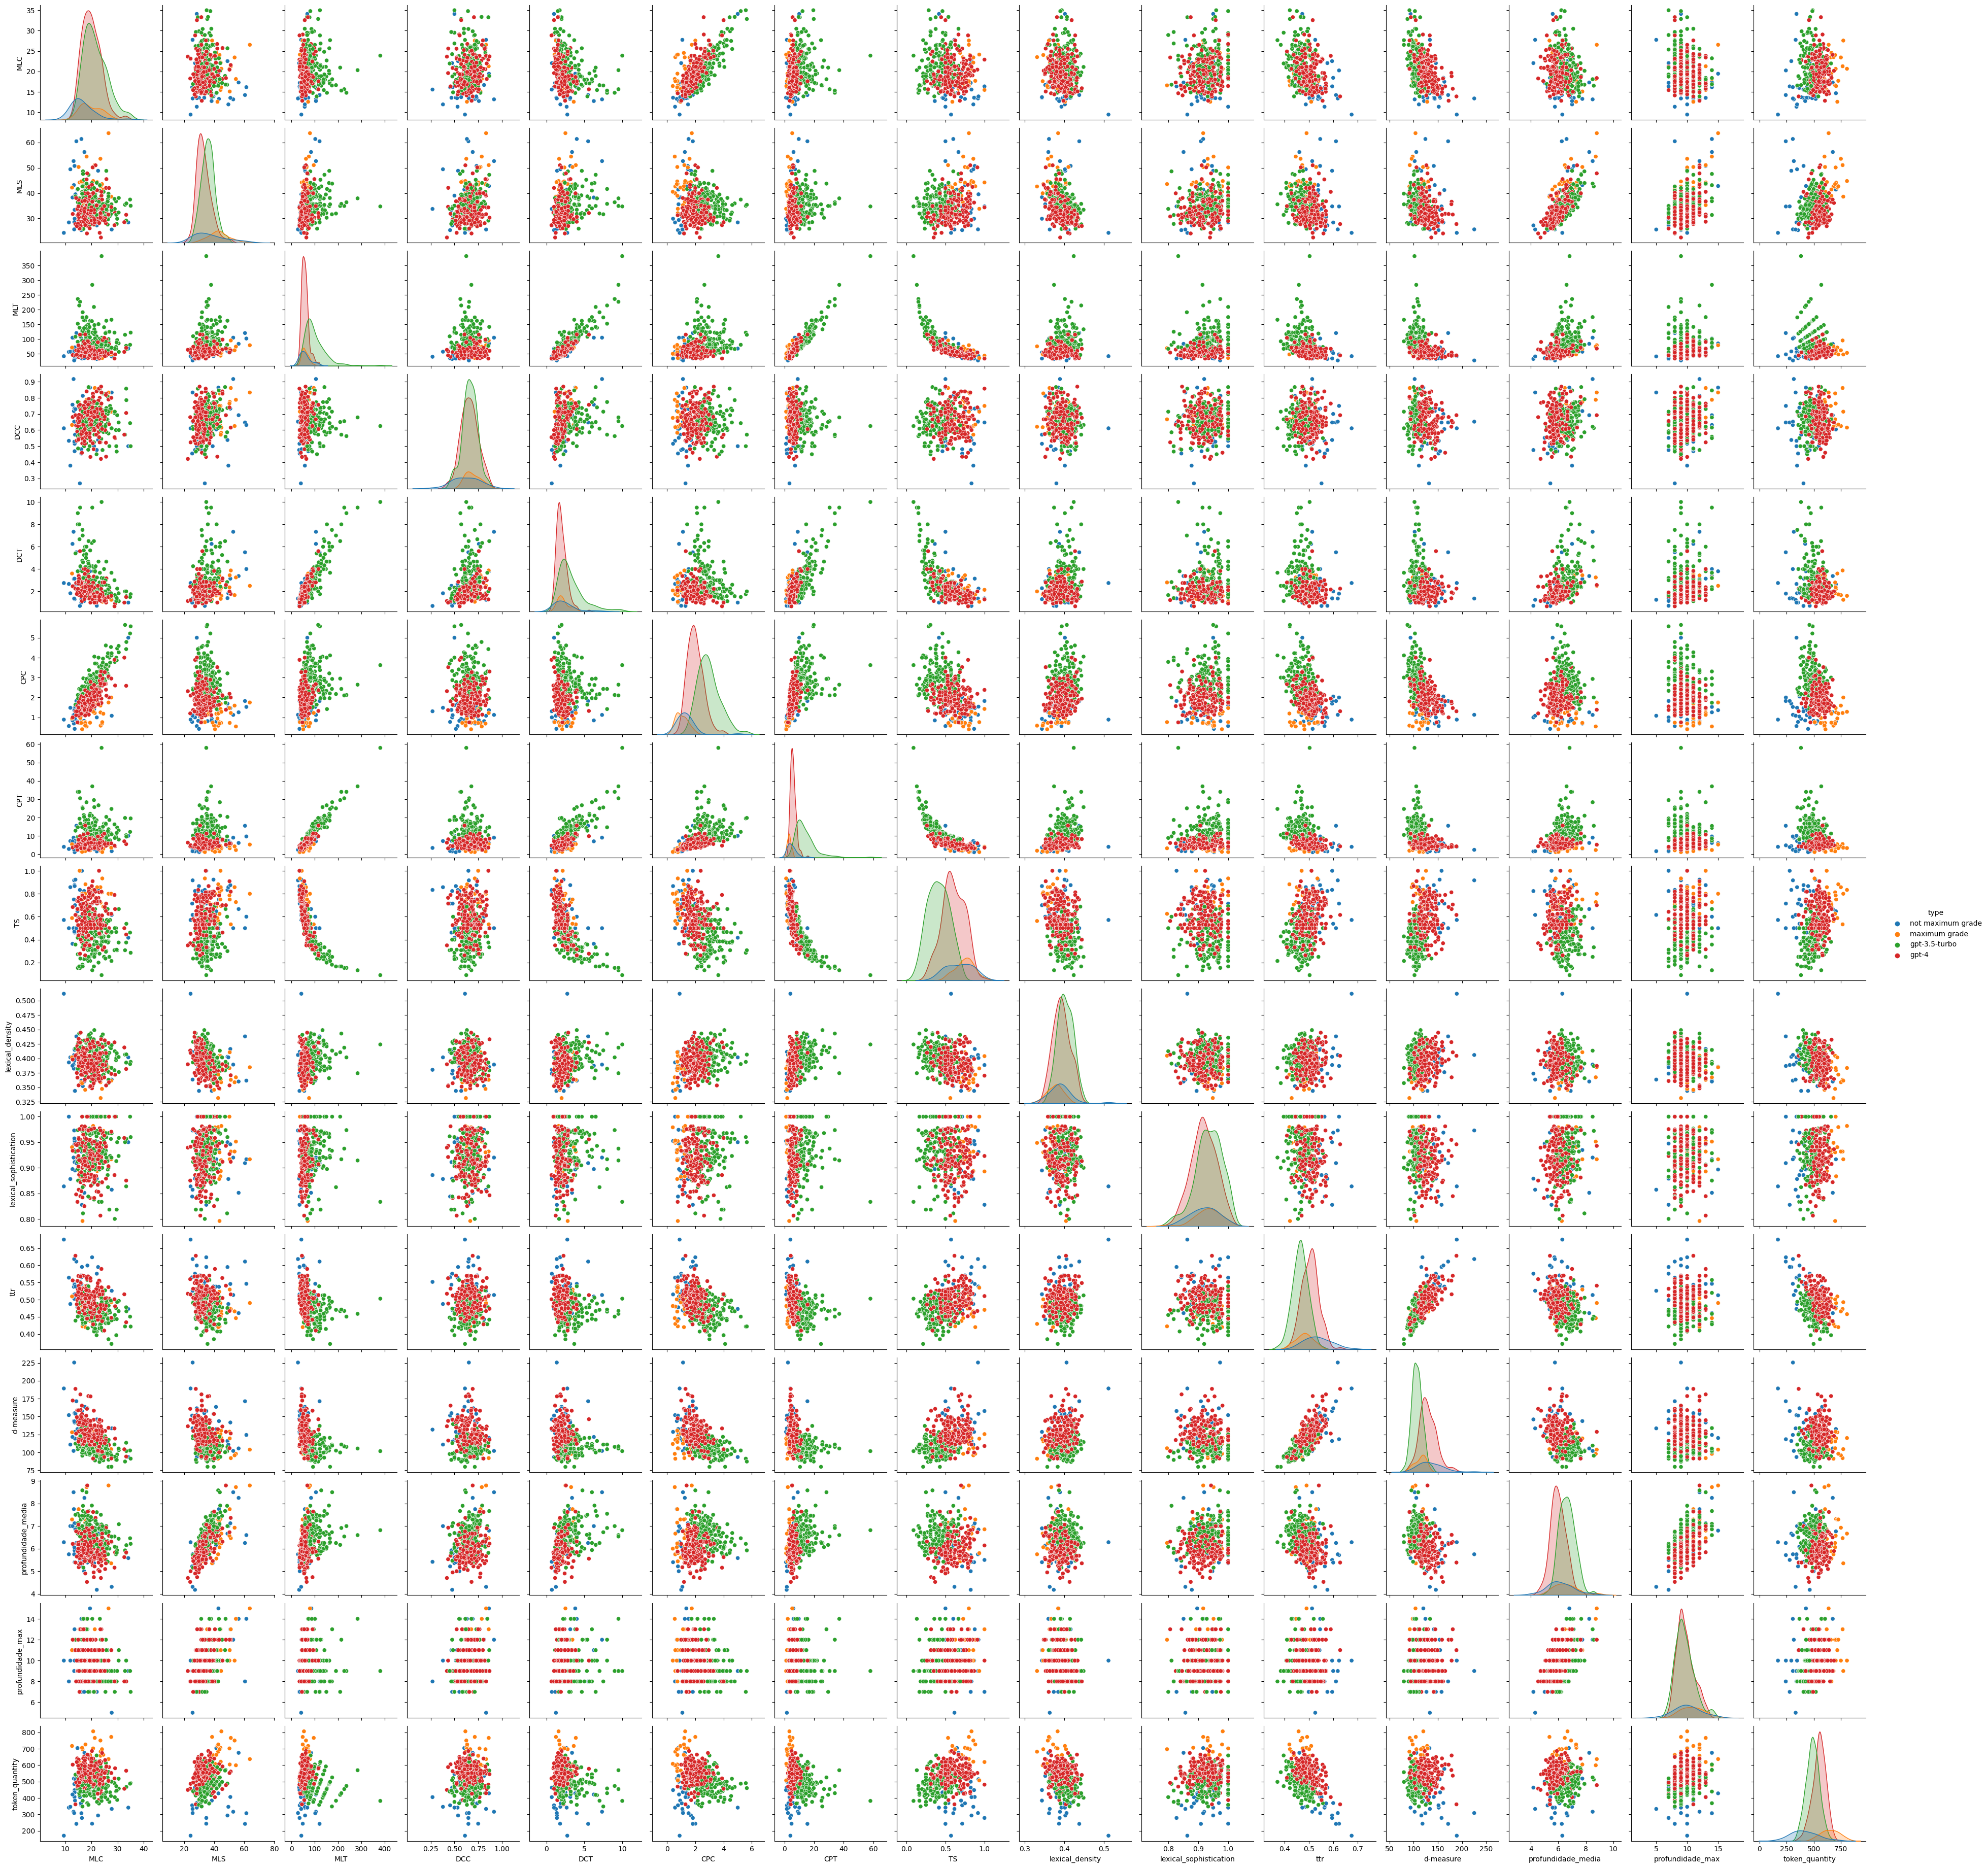

In [90]:
# sns.pairplot(df,hue="type")

In [12]:
mapp = {s:"LLM" for s in  df["type"].unique()}
mapp["not maximum grade"] = "human"
mapp["maximum grade"] = "human"
df["model"] = df["type"].map(mapp)

In [79]:
df["type"].unique()

array(['not maximum grade', 'maximum grade', 'gpt-3.5-turbo', 'gpt-4'],
      dtype=object)

In [156]:
from scipy.stats import ttest_ind
from scipy.stats import anderson


grouped_data = df.groupby('model')

group1 = grouped_data.get_group("human")
group2 = grouped_data.get_group("LLM")

ttest_results = {
    'Feature': [],
    'T-Statistic': [],
    'P-Value': [],
    'Significant': [],
    'Normality': []
}
for column in df.select_dtypes(include='number').columns:
    # Extract the data for each group for the current column
    data1 = group1[column]
    data2 = group2[column]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(data1, data2,permutations=10000)
    
    # Determine if the result is significant (p-value < 0.05)
    significant = p_value < 0.05

    normal = anderson(data1, 'norm').statistic < 0.05
    
    # Store the results in the dictionary
    ttest_results['Feature'].append(column)
    ttest_results['T-Statistic'].append(t_stat)
    ttest_results['P-Value'].append(p_value)
    ttest_results['Significant'].append(significant)
    ttest_results['Normality'].append(normal)

In [157]:
results_df = pd.DataFrame(ttest_results)
results_df.sort_values(by = 'Significant',inplace=True)
results_df

Feature  T-Statistic   P-Value  Significant  Normality
3                      DCC    -0.362289  0.719628        False      False
4                      DCT    -1.433680  0.152885        False      False
9   lexical_sophistication    -0.126454  0.900610        False      False
12      profundidade_media     0.242820  0.815618        False      False
14          token_quantity    -0.110873  0.910109        False      False
0                      MLC    -4.553815  0.000100         True      False
1                      MLS     6.834014  0.000100         True      False
2                      MLT    -3.777355  0.000500         True      False
5                      CPC   -11.065828  0.000100         True      False
6                      CPT    -6.722226  0.000100         True      False
7                       TS     8.760510  0.000100         True      False
8          lexical_density    -4.361980  0.000100         True      False
10                     ttr     4.750332  0.000100         True      False
11               d-measure     2.974079  0.003900         True      False
13        profundidade_max     3.615875  0.000500         True      False

In [82]:
significant_ones = results_df[results_df["Significant"]== True]
significant_ones

Feature  T-Statistic       P-Value  Significant  Normality
0                      MLC    -3.505865  5.205379e-04         True      False
1                      MLS    -5.467505  9.243590e-08         True      False
2                      MLT   -11.114689  1.818848e-24         True      False
4                      DCT    -8.536034  5.797724e-16         True      False
5                      CPC   -12.408086  4.224459e-29         True      False
6                      CPT   -14.173370  1.106639e-35         True      False
7                       TS    12.189898  2.634145e-28         True      False
8          lexical_density    -4.124140  4.755050e-05         True      False
9   lexical_sophistication    -3.411815  7.286986e-04         True      False
10                     ttr    10.795047  2.359546e-23         True      False
11               d-measure    13.697317  6.945844e-34         True      False
12      profundidade_media    -9.623037  2.094414e-19         True      False
14          token_quantity     8.849022  6.256583e-17         True      False

<Figure size 1000x600 with 0 Axes>

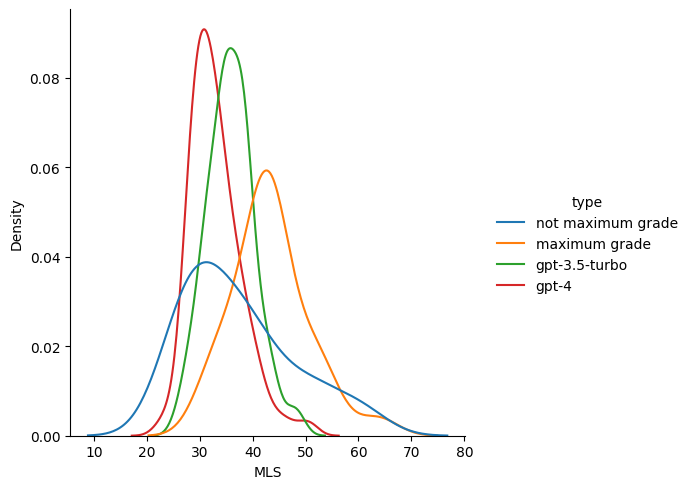

<Figure size 1000x600 with 0 Axes>

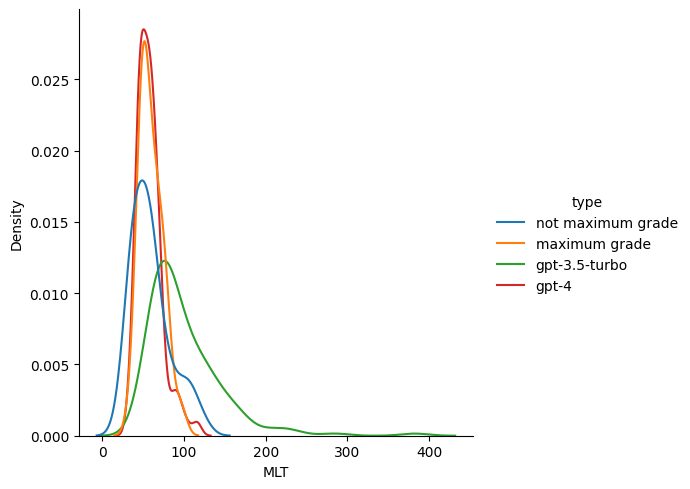

<Figure size 1000x600 with 0 Axes>

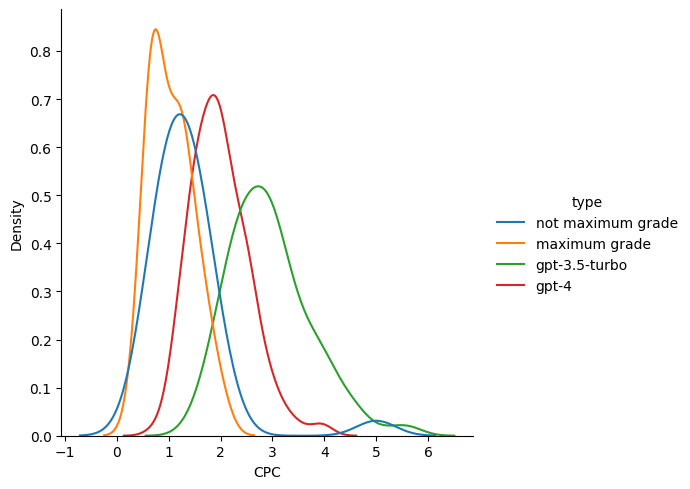

<Figure size 1000x600 with 0 Axes>

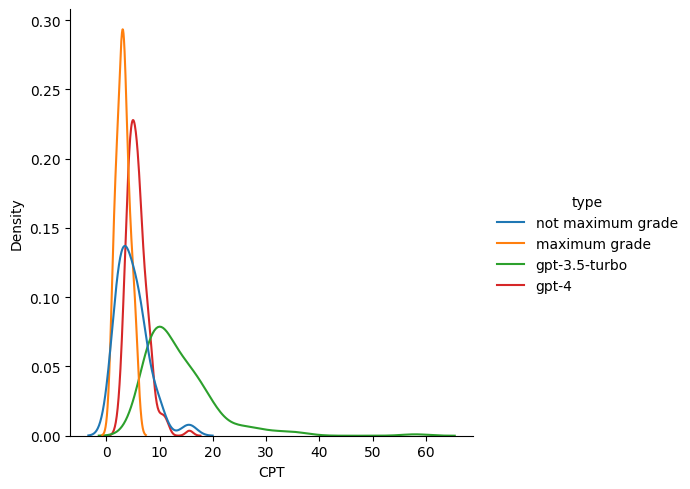

<Figure size 1000x600 with 0 Axes>

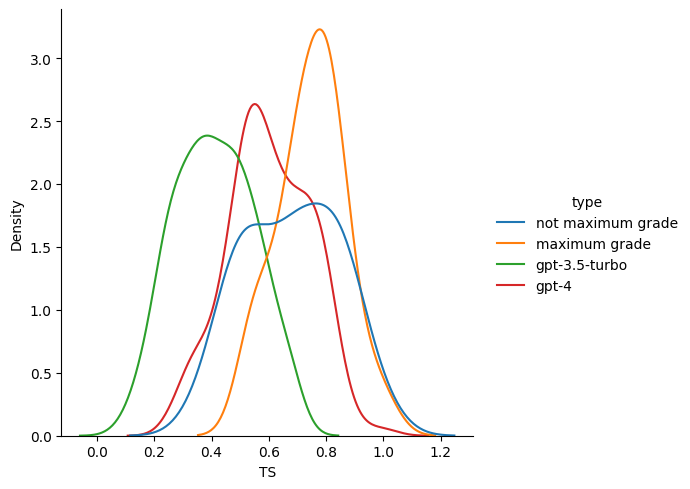

<Figure size 1000x600 with 0 Axes>

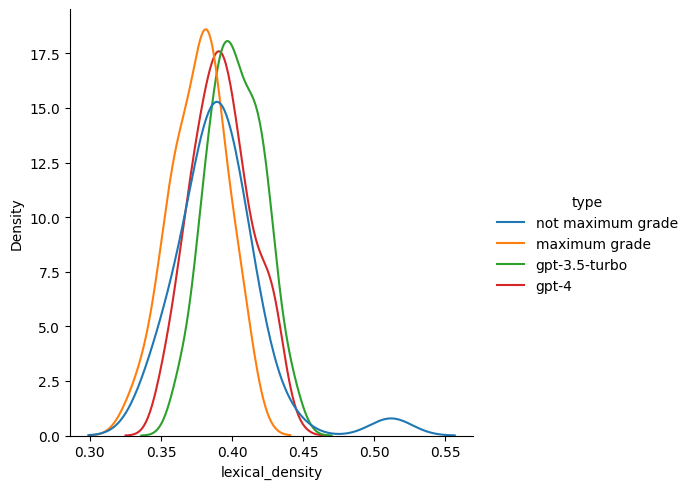

<Figure size 1000x600 with 0 Axes>

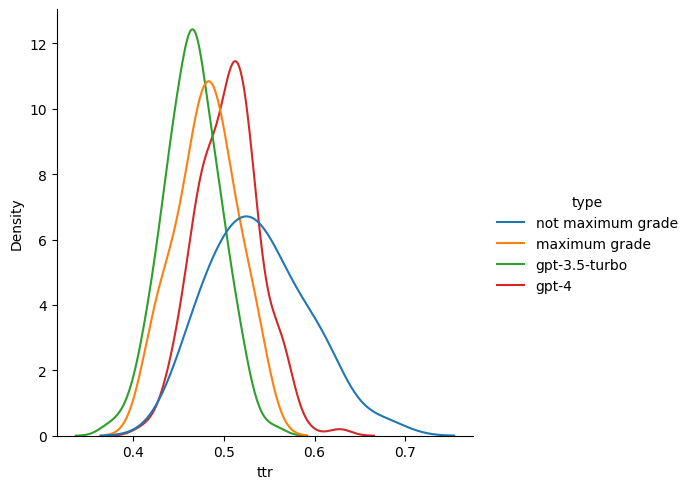

In [60]:
for feature in significant_ones["Feature"]: 
    plt.figure(figsize=(10, 6))  # Set figure size
    ax = sns.displot(data=df, x=feature,hue="type",kind="kde",common_norm=False)
    plt.show()

In [137]:
significant_features = df[list(significant_ones["Feature"])]
normalized_features = (significant_features - significant_features.mean()) / significant_features.std()
normalized_features["type"] = df["type"]

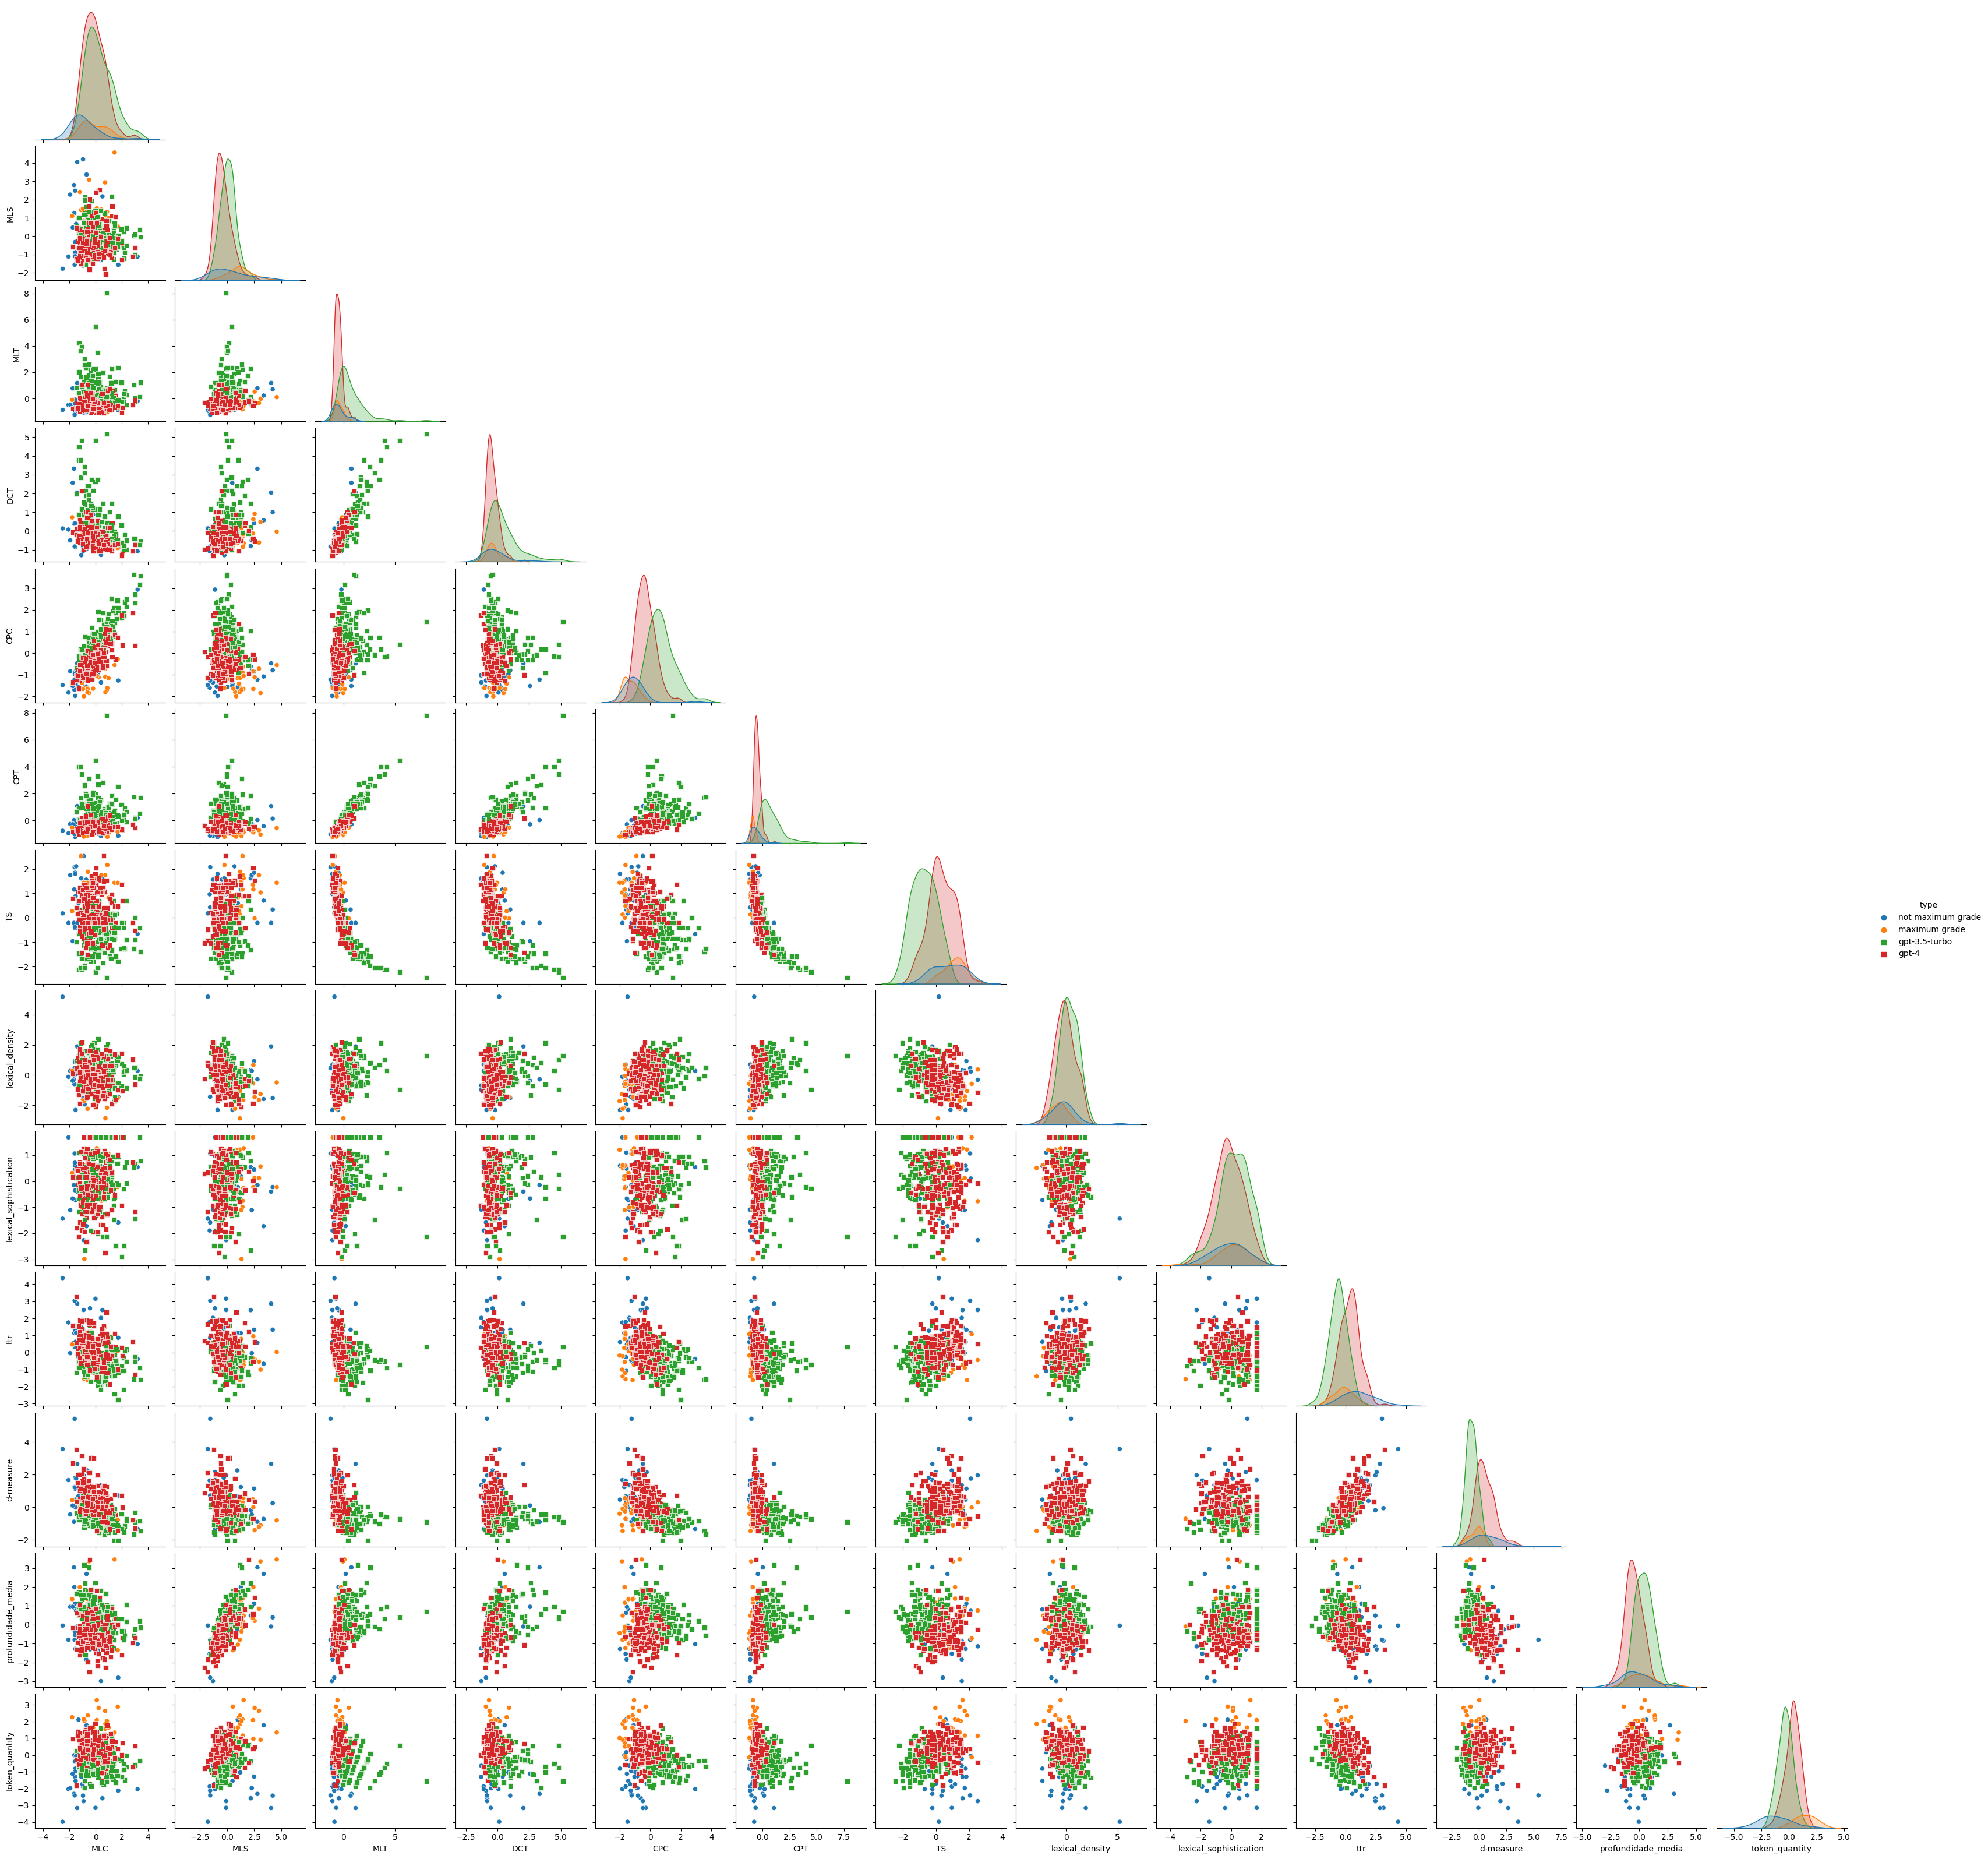

In [138]:
sns.pairplot(normalized_features,hue="type",corner=True,markers=["o", "o", "s","s"])
plt.show()

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Select significant features and the target column "model"
features = df[list(significant_ones["Feature"]) + ["model"]]

# Prepare data for classification
X = features.drop(columns=["model"])  # Features
y = features["model"]  # Target

import numpy as np

# Initialize lists to store accuracy scores
accuracy_scores = []

# Number of trials
num_trials = 50

for _ in range(num_trials):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1000))
    
    # Initialize SVM Classifier
    classifier = DecisionTreeClassifier()
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate mean and standard deviation of accuracy
accuracy_mean = np.mean(accuracy_scores)
accuracy_std = np.std(accuracy_scores)

print("Mean Accuracy:", accuracy_mean)
print("Accuracy Standard Deviation:", accuracy_std)


Mean Accuracy: 0.9054545454545455
Accuracy Standard Deviation: 0.028100006932568363
